In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import re
import os.path

In [3]:
# test result function
def frobenius_norm(M1, M2):
    #print M1
    #print M2
    total = 0.0
    for a,b in zip(M1, M2):
        for c, d in zip(a, b):
            total += (c - d)*(c - d)
    return total

In [4]:
# dimension of each example in the dataset
d = 15
# k is the top pricipal calculated by the eigenvectors, right now just fix it
k = 5
# fix the learning rate
learning_rate = 0.00001
# preprocess the data
data_set = []
data_set_done = []
if os.path.exists('new_data_1'):
    with open('new_data_1') as data:
        for line in data:
            data_set_done.append(map(float, line.split()))

else:
    with open('adult.data.txt') as data:
        for line in data:
            # '\s' matches whitespace
            tmp = re.sub(r'\s', '', line).split(',')
            data_set.append(tmp)
    print data_set

    feature_vector_size = len(data_set[0])
    print "feature vector is  " ,feature_vector_size
    print "data set size is ", len(data_set)
    tmp = data_set[0]

    # find out which feature is not a digit
    non_digit_index = []
    for i in range (0,feature_vector_size):
        if tmp[i].isdigit():
            continue
        else:
            non_digit_index.append(i)
    print non_digit_index

    # make each string feature to become a number

    # Copy
    modified_data_set= []
    for item in data_set:
        modified_data_set.append(item)


    print "data before processed dimension is ", len(modified_data_set[0])
    #print modified_data_set
    item_list = []
    count = 0
    dimension_to_increase = 0
    # for all the non_digit index, count how many differnt items
    for i in non_digit_index:
        # clear the item list to find different string for same feature
        items = []
        # loop through the whole data set
        for vector in data_set:
            # get the corresponsding item
            tmp = vector[i]
            # it already in the list
            if tmp in items:
                continue
            else:
                # otherwise append to the list
                items.append(tmp)
        dimension_to_increase = dimension_to_increase + len(items)-1
        #print "item is "
        #print items
        #print "\n\n"
        # loop through the whole data set to replace the feature
        for j in range(len(modified_data_set)):
            v = modified_data_set[j]
            #print v
            # get the item in the vector
            #print "accessing ", i+count
            tmp = v[i+count]
            index  = items.index(tmp)
            front = v[0:i+count]
            end = v[i+1+count:len(v)]
            zeros = [0]*len(items)
            zeros[index] = 1
            front.extend(zeros)
            front.extend(end)
            modified_data_set[j] = front
            #print "result is ", modified_data_set[j]
            #v[i] = float(index)
        count = count + len(items)-1
    for v in modified_data_set:
        v = map(float, v)
        data_set_done.append(v)
    print "dimension to increase ", dimension_to_increase
    print "data processed dimension is ", len(data_set_done[0])
    #print data_set_done
    print "size of data set done is ", len(data_set_done)

f = open('new_data', 'w')
for vector in data_set_done:
    for num in vector:
        f.write(str(num)+" ")
    f.write("\n")
f.close()


In [5]:
# pre-process the data
# find the largest item in the column and divide by that number
d = len(data_set_done[0])
largest = 0.0
largest_list = []

# loop each column and find the largest element
for i in range(0,d):
    largest = 0.0
    for item in data_set_done:
        if item[i] >= largest:
            largest = item[i]
    largest_list.append(largest)

tmp = 0.0
for i in range(0,d):
    tmp = largest_list[i]
    # divide all the items by the largest one to normalize
    for item in data_set_done:
        item[i] = item[i]/tmp
    
f = open('new_data_1', 'w')
for vector in data_set_done:
    for num in vector:
        f.write(str(num)+" ")
    f.write("\n")
f.close()

In [5]:
# helper function to normalize a vector
# v = np.array([[x1,x2]])
def normalizeVector(v):
    #print "v is ", v
    distance = 0.0
    for i in v:
        for j in i:
            distance = distance + j**2
            # for k in j:
            # 	print "k is ", k
                # distance = distance + k**2
    distance = math.sqrt(distance)
    v = v/distance
    #print "v returned ", v
    return v

# helper function to calculate the distance between two vectors
# v1 = np.array([[x1,x2]])
# v2 = np.array([[x1,x2]])
def distance(v1,v2):
    distance = 0.0
    for i,j in zip(v1,v2):
        for x, y in zip(i, j):
            distance = distance + (x- y)**2
    distance = math.sqrt(distance)
    return distance

# v is np.array([[x1,x2,x3....]])
# v is column-major vector
def testFunction(v):
    total = 0.0
    for item in data_set_done:
        tmp = np.array([item])
        dotProduct = np.dot(tmp,v) # dotproduct should be a constant
        #print "dotProduct is ", dotProduct
        dotProduct = dotProduct * v # dotproduct is a column major vector
        total = total + distance(tmp,dotProduct)   
    return total

In [8]:
# data set size covariance matrix M
N = len(data_set_done)
M = np.array(data_set_done[0]) * np.transpose(np.array(data_set_done[0])) / N
for i in range(1, len(data_set_done)):
    M = M + (np.array([data_set_done[i]]) * np.transpose(np.array([data_set_done[i]]))) / N
print "M is "
print M

U, s, V = np.linalg.svd(M, full_matrices=True)
print s

M is 
[[  2.06740636e-01   1.74847892e-02   3.89927964e-02 ...,   1.09196755e-05
    3.10304761e-01   1.18397606e-01]
 [  1.74598446e-02   3.98636406e-02   0.00000000e+00 ...,   0.00000000e+00
    2.90224502e-02   1.08411904e-02]
 [  3.89985634e-02   3.07115875e-05   7.80381438e-02 ...,   0.00000000e+00
    5.58336660e-02   2.22351893e-02]
 ..., 
 [  1.66866292e-05   3.07115875e-05   0.00000000e+00 ...,   3.07115875e-05
    6.14231750e-05   0.00000000e+00]
 [  3.10279817e-01   2.90224502e-02   5.58029545e-02 ...,   3.07115875e-05
    7.59190443e-01   0.00000000e+00]
 [  1.18403373e-01   1.08719020e-02   2.22351893e-02 ...,   0.00000000e+00
    3.07115875e-05   2.40809557e-01]]
[  4.99047579e+00   9.47494033e-01   3.84173393e-01   3.28023626e-01
   2.60877129e-01   2.58519959e-01   2.20754550e-01   1.84105011e-01
   1.69024545e-01   1.46673458e-01   1.30185715e-01   1.14914977e-01
   1.12559572e-01   1.07092625e-01   1.04557541e-01   9.01387434e-02
   8.81591695e-02   8.39462052e-02   7

learning rate is  1.0
test result is  [6853.095505072467, 4695.239554095187, 4311.164272377943, 4159.513889700695, 4781.23083359033, 4270.594699928705, 5125.7705025263695, 4261.253494064645, 4326.9491532749435, 4335.719206731128, 4413.04118428636, 4711.899915571002, 4205.192554767558, 4383.016916622756, 4222.419739102314, 4505.872122940542, 4457.24397657527, 4437.33988641003, 4345.211597665036, 4340.971950426357, 4135.2788989536075, 4325.46184094589, 4222.499078961991, 4211.641579802864, 4533.819513097008, 4435.186801883548, 4229.3746454735365, 4195.040767174521, 4198.522205321886, 4230.836671764433, 4294.585521817738, 4394.873471878014, 4309.97516640501, 4135.492652478321, 4263.626937590805, 4263.829052324394, 4291.904281497626, 4214.571267725232, 4345.542500863276, 4440.784154165862, 4260.157896580763]


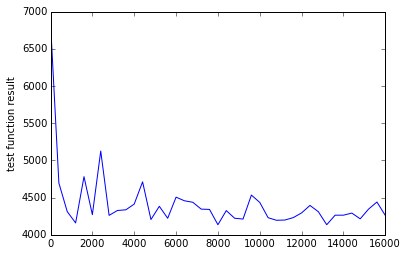

global v1,  [[  1.91477948e-001]
 [  5.61310499e-004]
 [  5.87151862e-002]
 [  3.26513404e-001]
 [  1.25398418e-002]
 [  1.72968208e-002]
 [  4.41459039e-003]
 [  1.37798215e-002]
 [  2.10414411e-012]
 [  2.47992084e-028]
 [  5.19289036e-002]
 [  5.71508291e-002]
 [  1.45709813e-001]
 [  1.06509179e-002]
 [  1.33309533e-002]
 [  1.19565701e-002]
 [  6.43162173e-002]
 [  2.08357392e-002]
 [  6.32086965e-002]
 [  8.99644562e-003]
 [  4.88733739e-003]
 [  2.66748518e-002]
 [  8.23223136e-005]
 [  5.94232104e-003]
 [  1.72133720e-005]
 [  2.45816337e-023]
 [  6.07473165e-005]
 [  2.82158480e-001]
 [  1.24332376e-001]
 [  2.09362879e-001]
 [  5.28511144e-002]
 [  5.79653633e-003]
 [  1.92145897e-002]
 [  4.59891692e-018]
 [  2.22634802e-002]
 [  3.08500663e-002]
 [  5.48789113e-002]
 [  1.04613695e-002]
 [  7.64819448e-002]
 [  2.02810128e-002]
 [  6.95383149e-002]
 [  7.32539889e-002]
 [  1.90453522e-002]
 [  6.31889574e-003]
 [  5.35649039e-002]
 [  6.75480746e-003]
 [  4.41459039e-003]
 

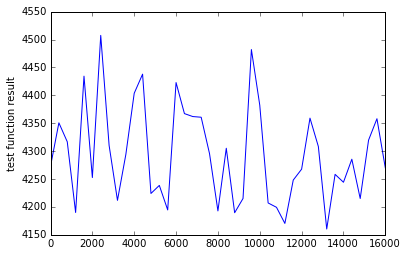

global v1,  [[  1.91593798e-001]
 [  1.28411570e-003]
 [  5.65479953e-002]
 [  3.27036091e-001]
 [  1.25893936e-002]
 [  1.65484356e-002]
 [  8.32771862e-003]
 [  1.29020464e-002]
 [  1.13798809e-009]
 [  7.83148089e-021]
 [  5.33758429e-002]
 [  5.83202997e-002]
 [  1.48296682e-001]
 [  1.28580191e-002]
 [  1.55348642e-002]
 [  1.40490502e-002]
 [  6.91054532e-002]
 [  1.97703252e-002]
 [  5.47569841e-002]
 [  8.99755121e-003]
 [  4.28989930e-003]
 [  2.27907899e-002]
 [  2.89021812e-004]
 [  5.82067302e-003]
 [  1.01193729e-004]
 [  2.34616496e-017]
 [  2.54990852e-004]
 [  2.80357665e-001]
 [  1.33602633e-001]
 [  2.07175514e-001]
 [  5.00830412e-002]
 [  5.33318723e-003]
 [  1.89771612e-002]
 [  1.15758256e-013]
 [  2.00642604e-002]
 [  3.42247445e-002]
 [  5.39177106e-002]
 [  1.28966779e-002]
 [  7.03848784e-002]
 [  2.34753246e-002]
 [  6.59715876e-002]
 [  7.26913489e-002]
 [  1.82296430e-002]
 [  8.57726789e-003]
 [  5.16944926e-002]
 [  7.57365217e-003]
 [  8.32771862e-003]
 

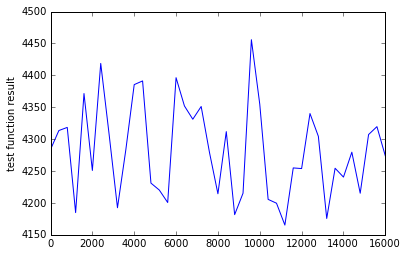

global v1,  [[  1.91649773e-001]
 [  1.96639931e-003]
 [  5.41557489e-002]
 [  3.27958727e-001]
 [  1.26214818e-002]
 [  1.61816546e-002]
 [  1.09943626e-002]
 [  1.22714732e-002]
 [  1.77882594e-008]
 [  1.40402429e-017]
 [  5.40791305e-002]
 [  5.94282222e-002]
 [  1.49655992e-001]
 [  1.38726065e-002]
 [  1.69013683e-002]
 [  1.47146499e-002]
 [  7.21719642e-002]
 [  1.88102639e-002]
 [  4.99164808e-002]
 [  9.27514607e-003]
 [  3.91823705e-003]
 [  2.04950314e-002]
 [  4.91255522e-004]
 [  5.80937361e-003]
 [  2.14206749e-004]
 [  9.36486973e-015]
 [  4.75067561e-004]
 [  2.79442023e-001]
 [  1.39017886e-001]
 [  2.05689802e-001]
 [  4.91061180e-002]
 [  5.01330447e-003]
 [  1.84827503e-002]
 [  9.60122589e-012]
 [  1.88400044e-002]
 [  3.61571767e-002]
 [  5.29046880e-002]
 [  1.43887784e-002]
 [  6.76083947e-002]
 [  2.51930573e-002]
 [  6.40718566e-002]
 [  7.11522187e-002]
 [  1.81370411e-002]
 [  9.67068947e-003]
 [  5.08696291e-002]
 [  8.09406041e-003]
 [  1.09943626e-002]
 

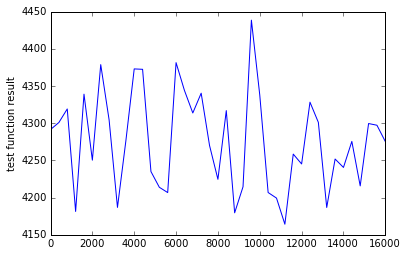

global v1,  [[  1.91735469e-001]
 [  2.59301189e-003]
 [  5.21738636e-002]
 [  3.28678789e-001]
 [  1.26548533e-002]
 [  1.59927282e-002]
 [  1.29087821e-002]
 [  1.18212678e-002]
 [  9.03581576e-008]
 [  1.17120446e-015]
 [  5.45142828e-002]
 [  6.03111537e-002]
 [  1.50559161e-001]
 [  1.44256662e-002]
 [  1.78304672e-002]
 [  1.49357267e-002]
 [  7.43885018e-002]
 [  1.80938873e-002]
 [  4.65595987e-002]
 [  9.56800571e-003]
 [  3.67914775e-003]
 [  1.89251849e-002]
 [  6.65063916e-004]
 [  5.86758154e-003]
 [  3.29222411e-004]
 [  3.21915509e-013]
 [  6.85017717e-004]
 [  2.78867810e-001]
 [  1.42478622e-001]
 [  2.04626907e-001]
 [  4.87945980e-002]
 [  4.82094725e-003]
 [  1.80313129e-002]
 [  1.30406589e-010]
 [  1.80709985e-002]
 [  3.75156859e-002]
 [  5.21031476e-002]
 [  1.54810562e-002]
 [  6.59706173e-002]
 [  2.63388920e-002]
 [  6.27873461e-002]
 [  6.96549534e-002]
 [  1.82682105e-002]
 [  1.03097691e-002]
 [  5.02968758e-002]
 [  8.46502238e-003]
 [  1.29087821e-002]
 

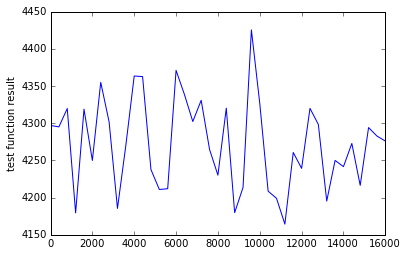

global v1,  [[  1.91832746e-001]
 [  3.16205569e-003]
 [  5.05606712e-002]
 [  3.29218303e-001]
 [  1.26857432e-002]
 [  1.58941758e-002]
 [  1.43443306e-002]
 [  1.14817548e-002]
 [  2.72026481e-007]
 [  2.35297394e-014]
 [  5.48157680e-002]
 [  6.10153258e-002]
 [  1.51241172e-001]
 [  1.47502793e-002]
 [  1.84985743e-002]
 [  1.49717674e-002]
 [  7.61056086e-002]
 [  1.75508070e-002]
 [  4.40187717e-002]
 [  9.83444717e-003]
 [  3.51723645e-003]
 [  1.77607966e-002]
 [  8.10925368e-004]
 [  5.95726224e-003]
 [  4.36997378e-004]
 [  3.54127784e-012]
 [  8.77335002e-004]
 [  2.78464214e-001]
 [  1.44852229e-001]
 [  2.03823082e-001]
 [  4.87731297e-002]
 [  4.70728844e-003]
 [  1.76444750e-002]
 [  7.63318601e-010]
 [  1.75471019e-002]
 [  3.85597408e-002]
 [  5.14836020e-002]
 [  1.63365435e-002]
 [  6.48726941e-002]
 [  2.71877828e-002]
 [  6.18273685e-002]
 [  6.83401673e-002]
 [  1.84676002e-002]
 [  1.07261344e-002]
 [  4.98313911e-002]
 [  8.74170716e-003]
 [  1.43443306e-002]
 

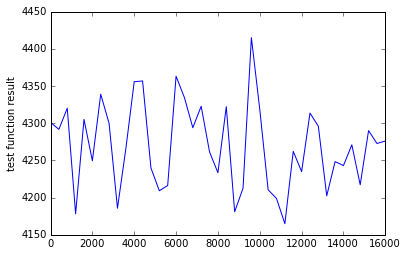

global v1,  [[  1.91930516e-001]
 [  3.67757590e-003]
 [  4.92340345e-002]
 [  3.29625920e-001]
 [  1.27134091e-002]
 [  1.58464085e-002]
 [  1.54565891e-002]
 [  1.12141550e-002]
 [  6.11003146e-007]
 [  2.13214778e-013]
 [  5.50391255e-002]
 [  6.15866462e-002]
 [  1.51796443e-001]
 [  1.49464930e-002]
 [  1.89982866e-002]
 [  1.49195791e-002]
 [  7.74937797e-002]
 [  1.71275075e-002]
 [  4.19945120e-002]
 [  1.00697111e-002]
 [  3.40359764e-003]
 [  1.68518051e-002]
 [  9.33247696e-004]
 [  6.06027472e-003]
 [  5.35072778e-004]
 [  2.05935222e-011]
 [  1.05174740e-003]
 [  2.78160016e-001]
 [  1.46561114e-001]
 [  2.03194026e-001]
 [  4.88877693e-002]
 [  4.64252258e-003]
 [  1.73134128e-002]
 [  2.78949354e-009]
 [  1.71698565e-002]
 [  3.94049682e-002]
 [  5.10011043e-002]
 [  1.70310128e-002]
 [  6.40783614e-002]
 [  2.78566321e-002]
 [  6.10696106e-002]
 [  6.72086131e-002]
 [  1.86808424e-002]
 [  1.10182640e-002]
 [  4.94267716e-002]
 [  8.95430229e-003]
 [  1.54565891e-002]
 

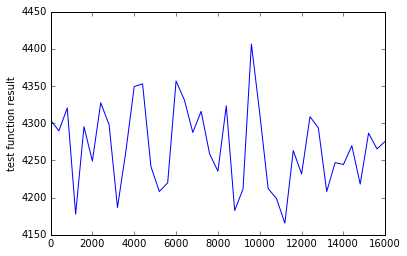

global v1,  [[  1.92023817e-001]
 [  4.14530769e-003]
 [  4.81276061e-002]
 [  3.29937776e-001]
 [  1.27383048e-002]
 [  1.58292450e-002]
 [  1.63402390e-002]
 [  1.09962070e-002]
 [  1.14251107e-006]
 [  1.17422506e-012]
 [  5.52121493e-002]
 [  6.20585101e-002]
 [  1.52269949e-001]
 [  1.50646755e-002]
 [  1.93833031e-002]
 [  1.48225141e-002]
 [  7.86485157e-002]
 [  1.67894559e-002]
 [  4.03261242e-002]
 [  1.02765718e-002]
 [  3.32200710e-003]
 [  1.61167749e-002]
 [  1.03641452e-003]
 [  6.16779909e-003]
 [  6.23402354e-004]
 [  8.03798735e-011]
 [  1.20980996e-003]
 [  2.77919941e-001]
 [  1.47834369e-001]
 [  2.02690970e-001]
 [  4.90673041e-002]
 [  4.60912689e-003]
 [  1.70270678e-002]
 [  7.59276231e-009]
 [  1.68869826e-002]
 [  4.01130478e-002]
 [  5.06206414e-002]
 [  1.76078853e-002]
 [  6.34739012e-002]
 [  2.84053104e-002]
 [  6.04502001e-002]
 [  6.62358461e-002]
 [  1.88876749e-002]
 [  1.12348448e-002]
 [  4.90630535e-002]
 [  9.12132655e-003]
 [  1.63402390e-002]
 

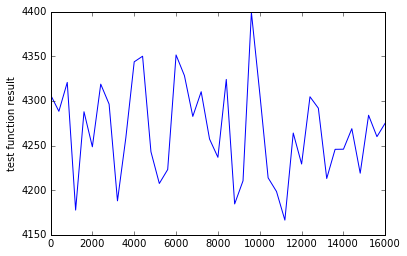

global v1,  [[  1.92110736e-001]
 [  4.57100241e-003]
 [  4.71923719e-002]
 [  3.30178685e-001]
 [  1.27611050e-002]
 [  1.58314242e-002]
 [  1.70562774e-002]
 [  1.08143193e-002]
 [  1.88789232e-006]
 [  4.62253669e-012]
 [  5.53505300e-002]
 [  6.24545410e-002]
 [  1.52685904e-001]
 [  1.51328937e-002]
 [  1.96869873e-002]
 [  1.47022886e-002]
 [  7.96288695e-002]
 [  1.65141018e-002]
 [  3.89172697e-002]
 [  1.04590091e-002]
 [  3.26269063e-003]
 [  1.55069246e-002]
 [  1.12406953e-003]
 [  6.27536857e-003]
 [  7.02751167e-004]
 [  2.39796922e-010]
 [  1.35340307e-003]
 [  2.77724355e-001]
 [  1.48807062e-001]
 [  2.02282886e-001]
 [  4.92761995e-002]
 [  4.59646560e-003]
 [  1.67762910e-002]
 [  1.69454832e-008]
 [  1.66681517e-002]
 [  4.07206920e-002]
 [  5.03170686e-002]
 [  1.80950370e-002]
 [  6.29971322e-002]
 [  2.88683808e-002]
 [  5.99312221e-002]
 [  6.53959231e-002]
 [  1.90807472e-002]
 [  1.14024858e-002]
 [  4.87298451e-002]
 [  9.25486574e-003]
 [  1.70562774e-002]
 

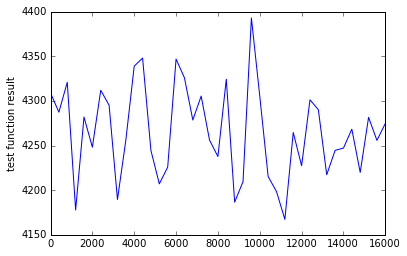

global v1,  [[  1.92190786e-001]
 [  4.95986870e-003]
 [  4.63923536e-002]
 [  3.30365819e-001]
 [  1.27824069e-002]
 [  1.58462262e-002]
 [  1.76458388e-002]
 [  1.06597065e-002]
 [  2.85670663e-006]
 [  1.43300528e-011]
 [  5.54638999e-002]
 [  6.27916560e-002]
 [  1.53058634e-001]
 [  1.51679319e-002]
 [  1.99311581e-002]
 [  1.45706102e-002]
 [  8.04740562e-002]
 [  1.62862088e-002]
 [  3.77056185e-002]
 [  1.06207176e-002]
 [  3.21941136e-003]
 [  1.49908931e-002]
 [  1.19910780e-003]
 [  6.38067424e-003]
 [  7.74096755e-004]
 [  5.90877693e-010]
 [  1.48430146e-003]
 [  2.77561357e-001]
 [  1.49564066e-001]
 [  2.01948637e-001]
 [  4.94958673e-002]
 [  4.59783122e-003]
 [  1.65540546e-002]
 [  3.28390097e-008]
 [  1.64945878e-002]
 [  4.12514933e-002]
 [  5.00724384e-002]
 [  1.85116447e-002]
 [  6.26108772e-002]
 [  2.92675382e-002]
 [  5.94882151e-002]
 [  6.46664048e-002]
 [  1.92579534e-002]
 [  1.15368278e-002]
 [  4.84209565e-002]
 [  9.36315944e-003]
 [  1.76458389e-002]
 

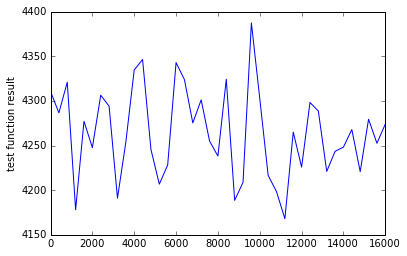

global v1,  [[  1.92264128e-001]
 [  5.31644342e-003]
 [  4.57008165e-002]
 [  3.30511347e-001]
 [  1.28026694e-002]
 [  1.58694319e-002]
 [  1.81377055e-002]
 [  1.05264064e-002]
 [  4.04955060e-006]
 [  3.72128759e-011]
 [  5.55585485e-002]
 [  6.30822106e-002]
 [  1.53397283e-001]
 [  1.51803629e-002]
 [  2.01306652e-002]
 [  1.44341068e-002]
 [  8.12115356e-002]
 [  1.60951216e-002]
 [  3.66485307e-002]
 [  1.07648155e-002]
 [  3.18800234e-003]
 [  1.45474184e-002]
 [  1.26380703e-003]
 [  6.48253734e-003]
 [  8.38405474e-004]
 [  1.26359735e-009]
 [  1.60406622e-003]
 [  2.77423243e-001]
 [  1.50161433e-001]
 [  2.01673096e-001]
 [  4.97163394e-002]
 [  4.60884407e-003]
 [  1.63550274e-002]
 [  5.73197208e-008]
 [  1.63540726e-002]
 [  4.17215109e-002]
 [  4.98737803e-002]
 [  1.88715276e-002]
 [  6.22913897e-002]
 [  2.96172670e-002]
 [  5.91044519e-002]
 [  6.40288941e-002]
 [  1.94193753e-002]
 [  1.16475931e-002]
 [  4.81323157e-002]
 [  9.45201922e-003]
 [  1.81377055e-002]
 

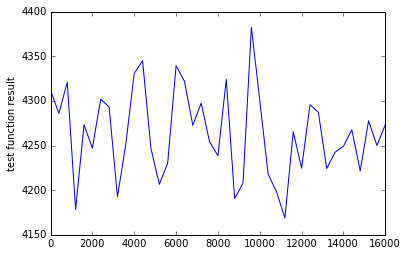

global v1,  [[  1.92331201e-001]
 [  5.64461830e-003]
 [  4.50975631e-002]
 [  3.30624117e-001]
 [  1.28222241e-002]
 [  1.58982867e-002]
 [  1.85526339e-002]
 [  1.04102024e-002]
 [  5.46066554e-006]
 [  8.43837301e-011]
 [  5.56387823e-002]
 [  6.33354101e-002]
 [  1.53708062e-001]
 [  1.51771170e-002]
 [  2.02959444e-002]
 [  1.42966478e-002]
 [  8.18613321e-002]
 [  1.59331580e-002]
 [  3.57155665e-002]
 [  1.08938645e-002]
 [  3.16557444e-003]
 [  1.41614747e-002]
 [  1.31996341e-003]
 [  6.58039611e-003]
 [  8.96554941e-004]
 [  2.42453212e-009]
 [  1.71403788e-003]
 [  2.77304754e-001]
 [  1.50637682e-001]
 [  2.01445042e-001]
 [  4.99322555e-002]
 [  4.62655819e-003]
 [  1.61751422e-002]
 [  9.23589265e-008]
 [  1.62383341e-002]
 [  4.21421808e-002]
 [  4.97115561e-002]
 [  1.91849854e-002]
 [  6.20227096e-002]
 [  2.99277053e-002]
 [  5.87679928e-002]
 [  6.34685213e-002]
 [  1.95659805e-002]
 [  1.17411019e-002]
 [  4.78610373e-002]
 [  9.52565880e-003]
 [  1.85526340e-002]
 

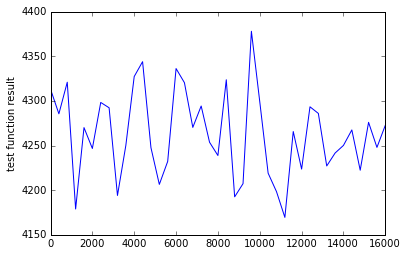

global v1,  [[  1.92392536e-001]
 [  5.94771561e-003]
 [  4.45670771e-002]
 [  3.30710714e-001]
 [  1.28413024e-002]
 [  1.59309360e-002]
 [  1.89059741e-002]
 [  1.03080070e-002]
 [  7.08005192e-006]
 [  1.72019593e-010]
 [  5.57076625e-002]
 [  6.35582395e-002]
 [  1.53995410e-001]
 [  1.51628804e-002]
 [  2.04345259e-002]
 [  1.41605269e-002]
 [  8.24385185e-002]
 [  1.57946318e-002]
 [  3.48842514e-002]
 [  1.10099588e-002]
 [  3.15006293e-003]
 [  1.38220840e-002]
 [  1.36900320e-003]
 [  6.67403511e-003]
 [  9.49314470e-004]
 [  4.27241032e-009]
 [  1.81535938e-003]
 [  2.77202145e-001]
 [  1.51020153e-001]
 [  2.01255917e-001]
 [  5.01408076e-002]
 [  4.64894181e-003]
 [  1.60112591e-002]
 [  1.39763021e-007]
 [  1.61415881e-002]
 [  4.25219476e-002]
 [  4.95786244e-002]
 [  1.94598964e-002]
 [  6.17936690e-002]
 [  3.02062187e-002]
 [  5.84700281e-002]
 [  6.29732744e-002]
 [  1.96990461e-002]
 [  1.18216167e-002]
 [  4.76049596e-002]
 [  9.58720437e-003]
 [  1.89059743e-002]
 

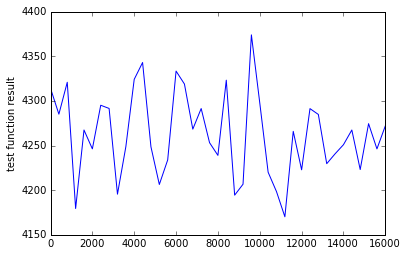

global v1,  [[  1.92448680e-001]
 [  6.22857201e-003]
 [  4.40972504e-002]
 [  3.30776146e-001]
 [  1.28600611e-002]
 [  1.59661003e-002]
 [  1.92093215e-002]
 [  1.02174923e-002]
 [  8.89507500e-006]
 [  3.21955158e-010]
 [  5.57674325e-002]
 [  6.37560862e-002]
 [  1.54262637e-001]
 [  1.51409023e-002]
 [  2.05519657e-002]
 [  1.40271033e-002]
 [  8.29547327e-002]
 [  1.56752383e-002]
 [  3.41375335e-002]
 [  1.11148169e-002]
 [  3.13995486e-003]
 [  1.35210034e-002]
 [  1.41206861e-003]
 [  6.76343578e-003]
 [  9.97348044e-004]
 [  7.03178898e-009]
 [  1.90900516e-003]
 [  2.77112652e-001]
 [  1.51328785e-001]
 [  2.01099053e-001]
 [  5.03406353e-002]
 [  4.67456425e-003]
 [  1.58609215e-002]
 [  2.01119642e-007]
 [  1.60596790e-002]
 [  4.28672351e-002]
 [  4.94695451e-002]
 [  1.97024135e-002]
 [  6.15961936e-002]
 [  3.04583216e-002]
 [  5.82038836e-002]
 [  6.25334035e-002]
 [  1.98199001e-002]
 [  1.18921034e-002]
 [  4.73623920e-002]
 [  9.63902080e-003]
 [  1.92093219e-002]
 

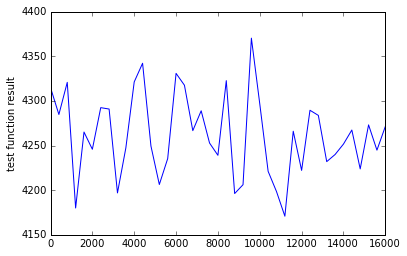

global v1,  [[  1.92500150e-001]
 [  6.48961607e-003]
 [  4.36784990e-002]
 [  3.30824287e-001]
 [  1.28786037e-002]
 [  1.60028801e-002]
 [  1.94715962e-002]
 [  1.01368586e-002]
 [  1.08916365e-005]
 [  5.61971531e-010]
 [  5.58197779e-002]
 [  6.39331665e-002]
 [  1.54512298e-001]
 [  1.51134814e-002]
 [  2.06524418e-002]
 [  1.38971647e-002]
 [  8.34191484e-002]
 [  1.55716558e-002]
 [  3.34621810e-002]
 [  1.12098589e-002]
 [  3.13411808e-003]
 [  1.32519006e-002]
 [  1.45008249e-003]
 [  6.84869105e-003]
 [  1.04122520e-003]
 [  1.09459323e-008]
 [  1.99580859e-003]
 [  2.77034170e-001]
 [  1.51578448e-001]
 [  2.00969163e-001]
 [  5.05312107e-002]
 [  4.70240051e-003]
 [  1.57221805e-002]
 [  2.77772002e-007]
 [  1.59895524e-002]
 [  4.31830520e-002]
 [  4.93801077e-002]
 [  1.99174253e-002]
 [  6.14242859e-002]
 [  3.06882466e-002]
 [  5.79643919e-002]
 [  6.21409405e-002]
 [  1.99298085e-002]
 [  1.19546815e-002]
 [  4.71319691e-002]
 [  9.68292707e-003]
 [  1.94715967e-002]
 

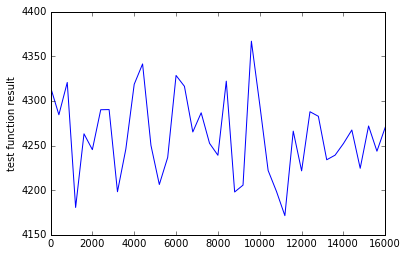

global v1,  [[  1.92547422e-001]
 [  6.73293509e-003]
 [  4.33031390e-002]
 [  3.30858184e-001]
 [  1.28969960e-002]
 [  1.60406333e-002]
 [  1.96997688e-002]
 [  1.00646846e-002]
 [  1.30550053e-005]
 [  9.25793825e-010]
 [  5.58659921e-002]
 [  6.40928230e-002]
 [  1.54746420e-001]
 [  1.50822704e-002]
 [  2.07391483e-002]
 [  1.37711426e-002]
 [  8.38391231e-002]
 [  1.54812780e-002]
 [  3.28477294e-002]
 [  1.12962683e-002]
 [  3.13169024e-003]
 [  1.30098157e-002]
 [  1.48379700e-003]
 [  6.92995536e-003]
 [  1.08143377e-003]
 [  1.62696889e-008]
 [  2.07648554e-003]
 [  2.76965062e-001]
 [  1.51780452e-001]
 [  2.00861997e-001]
 [  5.07124845e-002]
 [  4.73170582e-003]
 [  1.55934693e-002]
 [  3.70813434e-007]
 [  1.59289177e-002]
 [  4.34733858e-002]
 [  4.93070055e-002]
 [  2.01088730e-002]
 [  6.12733889e-002]
 [  3.08993099e-002]
 [  5.77474792e-002]
 [  6.17893240e-002]
 [  2.00299310e-002]
 [  1.20109016e-002]
 [  4.69125597e-002]
 [  9.72034264e-003]
 [  1.96997697e-002]
 

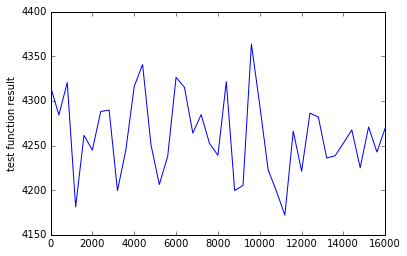

global v1,  [[  1.92590921e-001]
 [  6.96033107e-003]
 [  4.29649382e-002]
 [  3.30880266e-001]
 [  1.29152777e-002]
 [  1.60788969e-002]
 [  1.98993624e-002]
 [  9.99982730e-003]
 [  1.53703902e-005]
 [  1.45283838e-009]
 [  5.59070856e-002]
 [  6.42377367e-002]
 [  1.54966655e-001]
 [  1.50484737e-002]
 [  2.08145622e-002]
 [  1.36492433e-002]
 [  8.42206436e-002]
 [  1.54020298e-002]
 [  3.22857686e-002]
 [  1.13750398e-002]
 [  3.13200448e-003]
 [  1.27907991e-002]
 [  1.51383021e-003]
 [  7.00741469e-003]
 [  1.11839213e-003]
 [  2.32628858e-008]
 [  2.15165407e-003]
 [  2.76904023e-001]
 [  1.51943541e-001]
 [  2.00774097e-001]
 [  5.08846793e-002]
 [  4.76193284e-003]
 [  1.54735133e-002]
 [  4.81095425e-007]
 [  1.58760277e-002]
 [  4.37414671e-002]
 [  4.92476075e-002]
 [  2.02799745e-002]
 [  6.11399726e-002]
 [  3.10941565e-002]
 [  5.75498835e-002]
 [  6.14731103e-002]
 [  2.01213079e-002]
 [  1.20619216e-002]
 [  4.67032079e-002]
 [  9.75238927e-003]
 [  1.98993639e-002]
 

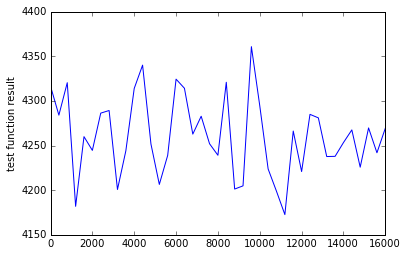

global v1,  [[  1.92631028e-001]
 [  7.17336697e-003]
 [  4.26587893e-002]
 [  3.30892489e-001]
 [  1.29334702e-002]
 [  1.61173339e-002]
 [  2.00748066e-002]
 [  9.94135298e-003]
 [  1.78233254e-005]
 [  2.18776284e-009]
 [  5.59438598e-002]
 [  6.43700803e-002]
 [  1.55174372e-001]
 [  1.50129782e-002]
 [  2.08806296e-002]
 [  1.35315293e-002]
 [  8.45686426e-002]
 [  1.53322388e-002]
 [  3.17694448e-002]
 [  1.14470161e-002]
 [  3.13453829e-003]
 [  1.25916592e-002]
 [  1.54069398e-003]
 [  7.08126866e-003]
 [  1.15245999e-003]
 [  3.21845295e-008]
 [  2.22185045e-003]
 [  2.76849994e-001]
 [  1.52074572e-001]
 [  2.00702620e-001]
 [  5.10481658e-002]
 [  4.79267579e-003]
 [  1.53612629e-002]
 [  6.09243952e-007]
 [  1.58295286e-002]
 [  4.39899533e-002]
 [  4.91997949e-002]
 [  2.04333858e-002]
 [  6.10212573e-002]
 [  3.12749280e-002]
 [  5.73689578e-002]
 [  6.11877502e-002]
 [  2.02048630e-002]
 [  1.21086223e-002]
 [  4.65030931e-002]
 [  9.77996337e-003]
 [  2.00748088e-002]
 

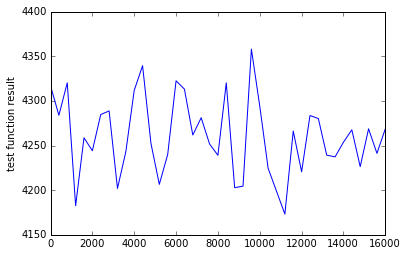

global v1,  [[  1.92668079e-001]
 [  7.37340474e-003]
 [  4.23804672e-002]
 [  3.30896450e-001]
 [  1.29515831e-002]
 [  1.61556982e-002]
 [  2.02296927e-002]
 [  9.88848854e-003]
 [  2.03999178e-005]
 [  3.17987458e-009]
 [  5.59769591e-002]
 [  6.44916312e-002]
 [  1.55370725e-001]
 [  1.49764420e-002]
 [  2.09388968e-002]
 [  1.34179718e-002]
 [  8.48872286e-002]
 [  1.52705413e-002]
 [  3.12931037e-002]
 [  1.15129166e-002]
 [  3.13887763e-003]
 [  1.24097849e-002]
 [  1.56481528e-003]
 [  7.15171958e-003]
 [  1.18394768e-003]
 [  4.32879387e-008]
 [  2.28754237e-003]
 [  2.76802105e-001]
 [  1.52178996e-001]
 [  2.00645211e-001]
 [  5.12033893e-002]
 [  4.82363191e-003]
 [  1.52558453e-002]
 [  7.55680357e-007]
 [  1.57883576e-002]
 [  4.42210589e-002]
 [  4.91618429e-002]
 [  2.05713207e-002]
 [  6.09150219e-002]
 [  3.14433813e-002]
 [  5.72025290e-002]
 [  6.09294154e-002]
 [  2.02814124e-002]
 [  1.21516851e-002]
 [  4.63115016e-002]
 [  9.80378835e-003]
 [  2.02296958e-002]
 

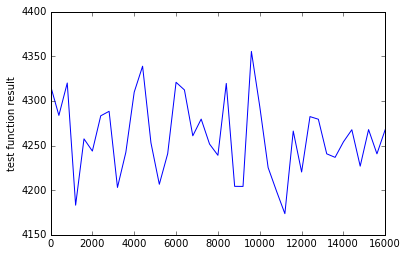

global v1,  [[  1.92702369e-001]
 [  7.56163654e-003]
 [  4.21264469e-002]
 [  3.30893458e-001]
 [  1.29696175e-002]
 [  1.61938100e-002]
 [  2.03669604e-002]
 [  9.84058625e-003]
 [  2.30869986e-005]
 [  4.48244881e-009]
 [  5.60069076e-002]
 [  6.46038560e-002]
 [  1.55556699e-001]
 [  1.49393566e-002]
 [  2.09906048e-002]
 [  1.33084843e-002]
 [  8.51798554e-002]
 [  1.52158146e-002]
 [  3.08520309e-002]
 [  1.15733602e-002]
 [  3.14469113e-003]
 [  1.22430151e-002]
 [  1.58655262e-003]
 [  7.21896608e-003]
 [  1.21312389e-003]
 [  5.68168227e-008]
 [  2.34913963e-003]
 [  2.76759630e-001]
 [  1.52261190e-001]
 [  2.00599902e-001]
 [  5.13508245e-002]
 [  4.85457441e-003]
 [  1.51565269e-002]
 [  9.20644185e-007]
 [  1.57516694e-002]
 [  4.44366500e-002]
 [  4.91323337e-002]
 [  2.06956405e-002]
 [  6.08194692e-002]
 [  3.16009745e-002]
 [  5.70487941e-002]
 [  6.06948635e-002]
 [  2.03516750e-002]
 [  1.21916450e-002]
 [  4.61278064e-002]
 [  9.82445322e-003]
 [  2.03669649e-002]
 

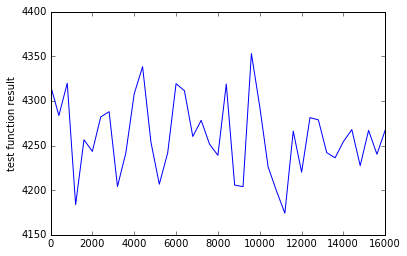

global v1,  [[  1.92734162e-001]
 [  7.73911050e-003]
 [  4.18937648e-002]
 [  3.30884602e-001]
 [  1.29875695e-002]
 [  1.62315382e-002]
 [  2.04890376e-002]
 [  9.79709791e-003]
 [  2.58722057e-005]
 [  6.15200049e-009]
 [  5.60341360e-002]
 [  6.47079742e-002]
 [  1.55733149e-001]
 [  1.49020902e-002]
 [  2.10367594e-002]
 [  1.32029452e-002]
 [  8.54494517e-002]
 [  1.51671261e-002]
 [  3.04422577e-002]
 [  1.16288828e-002]
 [  3.15171127e-003]
 [  1.20895442e-002]
 [  1.60620892e-003]
 [  7.28319931e-003]
 [  1.24022222e-003]
 [  7.30022519e-008]
 [  2.40700295e-003]
 [  2.76721956e-001]
 [  1.52324704e-001]
 [  2.00565037e-001]
 [  5.14909493e-002]
 [  4.88533318e-003]
 [  1.50626863e-002]
 [  1.10421623e-006]
 [  1.57187849e-002]
 [  4.46383152e-002]
 [  4.91100917e-002]
 [  2.08079223e-002]
 [  6.07331287e-002]
 [  3.17489303e-002]
 [  5.69062437e-002]
 [  6.04813318e-002]
 [  2.04162847e-002]
 [  1.22289284e-002]
 [  4.59514518e-002]
 [  9.84244134e-003]
 [  2.04890438e-002]
 

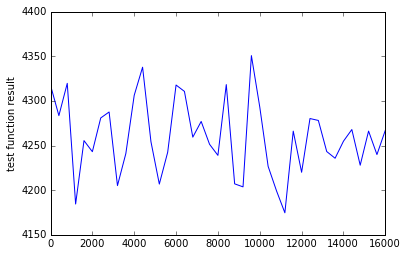

global v1,  [[  1.92763688e-001]
 [  7.90675191e-003]
 [  4.16799113e-002]
 [  3.30870786e-001]
 [  1.30054321e-002]
 [  1.62687878e-002]
 [  2.05979453e-002]
 [  9.75755529e-003]
 [  2.87440194e-005]
 [  8.24754563e-009]
 [  5.60590016e-002]
 [  6.48050070e-002]
 [  1.55900820e-001]
 [  1.48649191e-002]
 [  2.10781823e-002]
 [  1.31012120e-002]
 [  8.56985186e-002]
 [  1.51236952e-002]
 [  3.00604148e-002]
 [  1.16799509e-002]
 [  3.15972039e-003]
 [  1.19478495e-002]
 [  1.62404158e-003]
 [  7.34460097e-003]
 [  1.26544650e-003]
 [  9.20604288e-008]
 [  2.46145121e-003]
 [  2.76688563e-001]
 [  1.52372445e-001]
 [  2.00539215e-001]
 [  5.16242293e-002]
 [  4.91578081e-003]
 [  1.49737923e-002]
 [  1.30634074e-006]
 [  1.56891524e-002]
 [  4.48274185e-002]
 [  4.90941337e-002]
 [  2.09095117e-002]
 [  6.06547854e-002]
 [  3.18882832e-002]
 [  5.67736036e-002]
 [  6.02864531e-002]
 [  2.04758000e-002]
 [  1.22638786e-002]
 [  4.57819416e-002]
 [  9.85815222e-003]
 [  2.05979535e-002]
 

In [7]:
'''
    Implement Oja's rule to find the top k pricipal components of the dataset
'''

# initialize v0 as a vector drawn uniformly at raondom on the surface of a d-dimensional sphere
d = len(data_set_done[0])
v1 = []
prev_v = [] # record the previous v1 to test convergence
s = 0.0
t = len(data_set_done) # t is the data set lenght: how many data points there are
learning_rate = 1.0
print "learning rate is ",learning_rate
# random intialize a vector from a d-dim sphere
for i in range(0,d):
    tmp = np.random.random()
    s = s + tmp**2
    v1.append(tmp)
    prev_v.append(0.0)

s = math.sqrt(s)
#print "s is ", s
# normalize v1 
for i in range(0,d):
    v1[i] = v1[i] * 1.0/ s

a = np.dot(np.array([data_set_done[0]]),np.transpose(np.array([data_set_done[0]])))
#print a # a is a scalar
#print data_set_done[0] 
#print np.multiply(a,data_set_done[0]) # result is a vector

dis = 0.0
loop = 0.0
# test convergence
#print "distance is ", distance(prev_v,v1)
v1 = np.array([v1]) # v1 type np.array([[x1,x2]]) 
v1 = np.transpose(v1) # let v1 becomese a column major vector
prev_v = v1
testResult = []
tPoint = []

# stil have the infinite problem, need to normalize feature
while True:
    testResult = []
    tPoint = []
    #print "loop is ", loop
    for i in range(0, len(data_set_done)/2):
        loop = loop + 1
        learning_rate = 1.0/math.sqrt(loop)
        tmp = data_set_done[i] # convert to right form
        tmp = np.array([tmp])
        #print "dataset ", tmp # array([[]])
        #print "tranpose xt is ", np.transpose(tmp)
        #print "dot result ", np.dot(np.transpose(tmp),tmp)
        b = np.dot(np.transpose(tmp),tmp)
        b = np.dot(b,v1) # result will be a 110 * 1 vector
        #print "times learning plus ", tmp + learning_rate * b
        v1 = v1 + learning_rate * b 
        #print "v1 only sum ", v1
        v1 = normalizeVector(v1)
        #print "normalized v1 ", v1
        if i % 400 == 0:
            tPoint.append(i)
            test = testFunction(v1)
            testResult.append(test)
        #print "v1 local", v1
    #print "global v1, ", v1
    #if loop > 1:
    # right now use distance to test convergence
    #plt.plot(tPoint,testResult)
    print "test result is ", testResult
    plt.plot(tPoint, testResult, '-')
    #plt.axis([0, len(data_set_done), 0, 5000])
    plt.ylabel('test function result')
    plt.show()
    print "global v1, ", v1
    dis = distance(prev_v,v1)
    print "distance ", dis
    if dis <= 0.001:
            break
    prev_v = v1